In [155]:
import pandas as pd

# Data Exploration & Cleaning (Week 1)

In [156]:
data = pd.read_csv("/Users/rajatthakur/Desktop/SuperDataScienceML/CollaborationProjects/SDS-CP010-tech-companies-analysis/data/tech-companies.csv")

In [157]:
data

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",$825.4 M,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",$819.5 M,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,$819.3 M,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,$816.1 M,300552,China,Technology,Scientific & Technical Instruments


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


# Summary Statistics:

In [159]:
#Transformation of Market Cap to Numeric data to understand Marktet Cap Statistics
for i, marketCap in enumerate(data['Market Cap']):
    marketCap = marketCap.replace('$', '')
    
    if 'T' in marketCap:
        marketCap = float(marketCap.replace('T', '')) * 1e12
    elif 'B' in marketCap:
        marketCap = float(marketCap.replace('B', '')) * 1e9
    elif 'M' in marketCap:
        marketCap = float(marketCap.replace('M', '')) * 1e6
    else:
        marketCap = float(marketCap) 
    
    data['Market Cap'][i] = marketCap


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/547994546.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
data

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,2866000000000.0,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,2755000000000.0,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,1186000000000.0,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,495950000000.0,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,487640000000.0,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",825400000.0,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",819500000.0,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,819300000.0,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,816100000.0,300552,China,Technology,Scientific & Technical Instruments


In [161]:
pip install numerize 

Note: you may need to restart the kernel to use updated packages.


In [162]:
from numerize import numerize 


In [163]:
averageMarketCap = numerize.numerize(data['Market Cap'].mean())
print('Average Market Cap of Top 1000 Companies: ',averageMarketCap)


Average Market Cap of Top 1000 Companies:  18.76B


In [164]:
marketCapVariation = numerize.numerize(data['Market Cap'].std())
print('Standard Deviation(Market Cap Variation): ', marketCapVariation)

Standard Deviation(Market Cap Variation):  135.73B


In [165]:
medianMarketCap = numerize.numerize(data['Market Cap'].median())
print('Meidan Market Cap: ', medianMarketCap)

Meidan Market Cap:  2.74B


In [166]:
topTenCompanies = data[['Company', 'Market Cap']].head(10)
display('Top Ten Companies according to their Market Cap', topTenCompanies['Company'], topTenCompanies['Market Cap'].apply(numerize.numerize))

'Top Ten Companies according to their Market Cap'

0                                           Apple Inc.
1                                Microsoft Corporation
2                                   Nvidia Corporation
3                                        Broadcom Inc.
4    Taiwan Semiconductor Manufacturing Company Lim...
5                        Samsung Electronics Co., Ltd.
6                                    ASML Holding N.V.
7                                   Oracle Corporation
8                                           Adobe Inc.
9                                 salesforce.com, inc.
Name: Company, dtype: object

0      2.87T
1      2.76T
2      1.19T
3    495.95B
4    487.64B
5    392.38B
6     297.1B
7    282.01B
8    260.23B
9    243.78B
Name: Market Cap, dtype: object

In [167]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


# Top Ten Companies according to their market cap

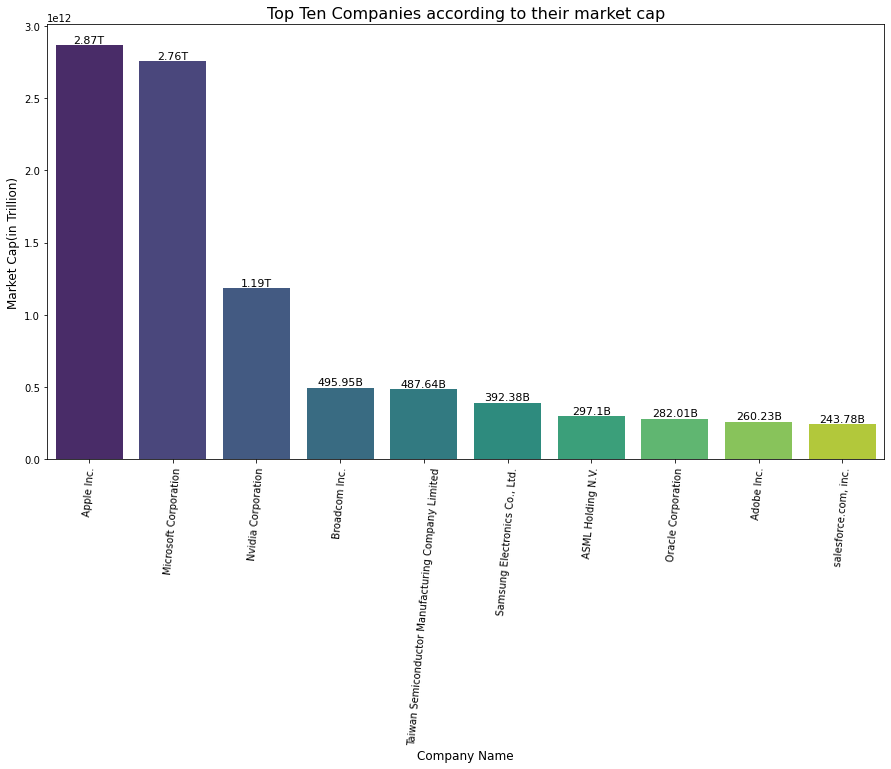

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

marketCap = topTenCompanies['Market Cap']

plt.figure(figsize=(15, 8))

ax = sns.barplot(x=topTenCompanies['Company'], y= marketCap, palette='viridis')
numerized_values = [numerize.numerize(val) for val in marketCap]
for i, val in enumerate(numerized_values):
    ax.text(i, marketCap[i], val, ha='center', va='bottom', fontsize=11, color='black')


plt.title('Top Ten Companies according to their market cap', fontsize=16)

plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Market Cap(in Trillion)', fontsize=12)
plt.xticks(rotation=85)
plt.show()

In [169]:
totalCountries = data['Country'].unique().size
print(totalCountries ,'countries are represented by the companies there.')

38 countries are represented by the companies there.


In [170]:
totalIndustries = data['Industry'].unique().size
print('Total number of Industries: ', totalIndustries)

Total number of Industries:  12


In [171]:
industriesSector = data['Sector'].unique()
print('All the industries belongs to', industriesSector, 'sector')

All the industries belongs to ['Technology'] sector


# Regional Market Analysis by Market Cap

In [172]:
import plotly.express as px

country_grouped = data.groupby('Country')['Market Cap'].sum().reset_index()

country_grouped['Market Cap'] = country_grouped['Market Cap'].apply(numerize.numerize)
fig = px.choropleth(country_grouped, locations='Country', locationmode='country names',
                    color='Market Cap', hover_name='Country', 
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(title='Market Cap by Country', title_x=0.5)
fig.show()

# Industries per Country with Market Cap

<Figure size 1080x360 with 0 Axes>

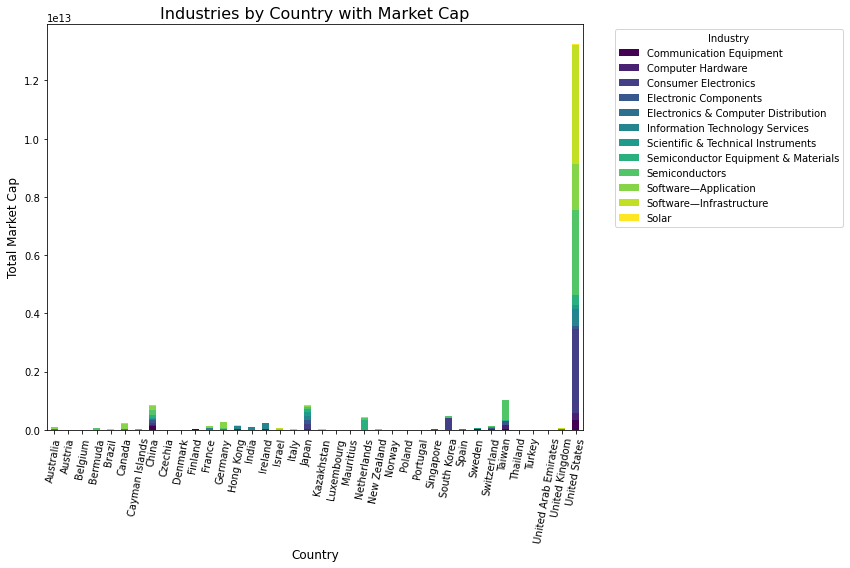

In [173]:
country_grouped = data.groupby(['Country', 'Industry'])['Market Cap'].sum().unstack()


plt.figure(figsize=(15, 5))
country_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Industries by Country with Market Cap', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Market Cap', fontsize=12)
plt.xticks(rotation=80)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()





In [174]:

pivot_table = data.pivot_table(values='Market Cap', index='Industry', columns='Country', aggfunc='sum',  margins=True)
pivot_table = pivot_table.applymap(lambda x: numerize.numerize(x) if x > 0 else '0')
pivot_table.index = pivot_table.index.map(lambda x: 'Total' if x == 'All' else x)
pivot_table = pivot_table.fillna(0)

display(pivot_table)


Country,Australia,Austria,Belgium,Bermuda,Brazil,Canada,Cayman Islands,China,Czechia,Denmark,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States,All
Industry,,,,,,,,,,,,,,,,,,,,,
Communication Equipment,0,0,0,0,1.41B,1.19B,0,146.84B,0,0,...,0,24.09B,1.46B,13.61B,0,0,0,0,345.63B,560.24B
Computer Hardware,0,1.16B,0,0,0,0,0,24.41B,0,0,...,0,0,14.57B,138.99B,0,0,0,0,224.1B,471.51B
Consumer Electronics,0,0,0,0,1.38B,0,0,69.64B,0,0,...,0,2.8B,0,946.9M,0,3.53B,0,0,2.88T,3.54T
Electronic Components,921M,1.07B,1.57B,0,0,3.35B,6.7B,110.05B,0,0,...,0,4.15B,42.62B,152.99B,3.08B,0,0,956.2M,121.26B,588.64B
Electronics & Computer Distribution,1.42B,0,0,0,0,0,0,909.1M,0,0,...,0,0,0,4.45B,1.79B,0,0,0,13.31B,32.04B
Information Technology Services,15.73B,0,1.19B,6.18B,2.71B,27.46B,0,36.26B,0,1.62B,...,33.87B,3.88B,4.54B,973.7M,0,0,2.65B,7.52B,560.98B,1.36T
Scientific & Technical Instruments,1.01B,0,0,0,0,0,0,26.58B,0,968.3M,...,0,32.17B,30.9B,2.98B,0,0,0,8.21B,131.97B,382.55B
Semiconductor Equipment & Materials,0,0,0,0,0,0,0,101.78B,0,0,...,0,0,0,20.53B,0,0,0,1.69B,367.97B,965.52B
Semiconductors,0,0,5.12B,50.2B,0,0,6.18B,157.73B,0,0,...,0,0,40.87B,692.25B,0,0,0,1.08B,2.9T,4.1T


# MarketCap percentage per Industry

In [175]:
import plotly.graph_objects as go

industry_market_cap = data.groupby('Industry')['Market Cap'].sum().reset_index()


fig = go.Figure(
    data=[go.Pie(
        labels=industry_market_cap['Industry'],
        values=industry_market_cap['Market Cap'],
        hoverinfo='label+percent+value',
        textinfo='percent',
        textfont_size=14,
        hole=0.4
    )]
)
fig.update_layout(
    title_text='Market Cap per Industry',
    annotations=[dict(text='Market Cap', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()


# Sector and Industry Insights:

Comparision of companies by number of industry.

In [176]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


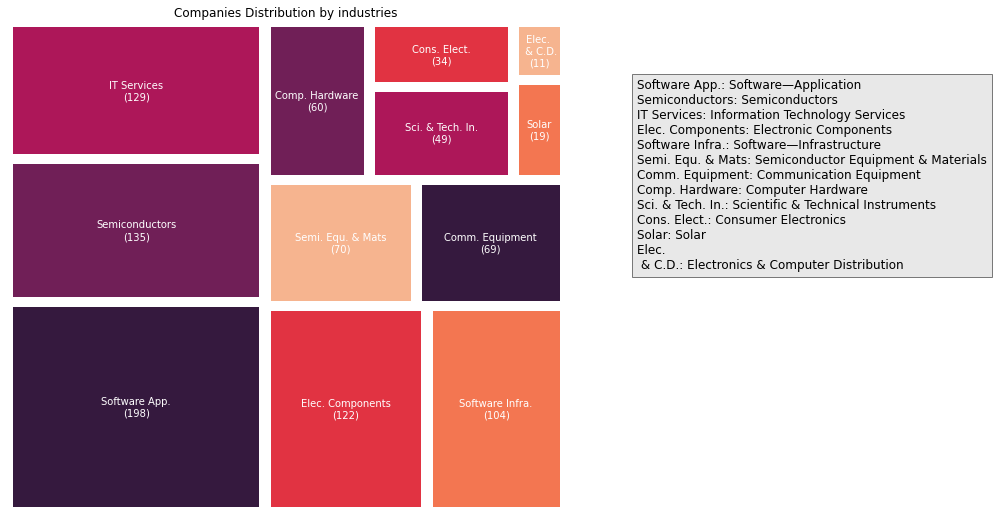

In [177]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

groupedIndustDF = pd.DataFrame(data)

industry_count = groupedIndustDF['Industry'].value_counts().reset_index()
industry_count.columns = ['Industry', 'Count']

industry_abbrevations ={
    'Software—Application' : 'Software App.',
    'Semiconductors' : 'Semiconductors',
    'Information Technology Services' : 'IT Services',
    'Electronic Components' : 'Elec. Components',
    'Software—Infrastructure' : 'Software Infra.',
    'Semiconductor Equipment & Materials' : 'Semi. Equ. & Mats',
    'Communication Equipment' : 'Comm. Equipment',
    'Computer Hardware' : 'Comp. Hardware',
    'Scientific & Technical Instruments' : 'Sci. & Tech. In.',
    'Consumer Electronics' : 'Cons. Elect.',
    'Solar' : 'Solar',
    'Electronics & Computer Distribution' :  'Elec. \n & C.D.'
    
}



industry_count['Short Industry'] = industry_count['Industry'].map(industry_abbrevations)

labels = [f"{abbr}\n({count})" for abbr, count in zip(industry_count['Short Industry'], industry_count['Count'])]


plt.figure(figsize=(10,9))
squarify.plot(sizes=industry_count['Count'], label=labels,pad = 0.2,  
              text_kwargs = {'fontsize': 10, 'color': 'white'},
              color=sb.color_palette("rocket"))

plt.axis('off')
plt.title('Companies Distribution by industries')

legend_text = "\n".join([f"{abbr}: {full}" for full,abbr in industry_abbrevations.items()])
plt.figtext(1,  0.5, legend_text, fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5,"pad":5})


plt.show()

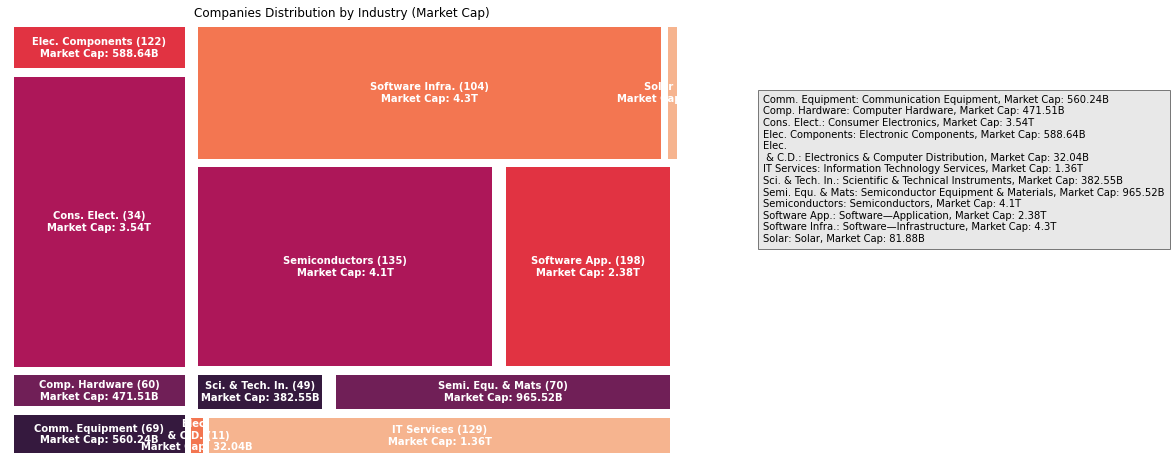

In [178]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

groupedIndustDF = pd.DataFrame(data)

industry_count = groupedIndustDF.groupby('Industry').agg(
                    Company_Count = ('Company','size'),
                    Market_Cap = ('Market Cap','sum')).reset_index()

#groupedIndustDF['Industry'].value_counts().reset_index()
#industry_count.columns = ['Industry', 'Count']

industry_abbrevations ={
    'Software—Application' : 'Software App.',
    'Semiconductors' : 'Semiconductors',
    'Information Technology Services' : 'IT Services',
    'Electronic Components' : 'Elec. Components',
    'Software—Infrastructure' : 'Software Infra.',
    'Semiconductor Equipment & Materials' : 'Semi. Equ. & Mats',
    'Communication Equipment' : 'Comm. Equipment',
    'Computer Hardware' : 'Comp. Hardware',
    'Scientific & Technical Instruments' : 'Sci. & Tech. In.',
    'Consumer Electronics' : 'Cons. Elect.',
    'Solar' : 'Solar',
    'Electronics & Computer Distribution' :  'Elec. \n & C.D.'
    
}



industry_count['Short Industry'] = industry_count['Industry'].map(industry_abbrevations)
industry_count['Formatted Market Cap'] = industry_count['Market_Cap'].apply(numerize.numerize)


labels = [f"{abbr} ({count})\nMarket Cap: {market_cap}" for abbr, count, market_cap
          in zip(industry_count['Short Industry'], industry_count['Company_Count'],
                                                                  industry_count['Formatted Market Cap'])]


plt.figure(figsize=(12,8))
squarify.plot(sizes=industry_count['Market_Cap'], label=labels,pad = 1.5,  
              text_kwargs = {'fontsize': 10, 'color': 'white', 'weight': 'bold'},
              color=sb.color_palette("rocket"))

plt.axis('off')
plt.title('Companies Distribution by Industry (Market Cap)')

#legend_text = "\n".join([f"{abbr}: {full}" for full,abbr in industry_abbrevations.items()])
legend_text = "\n".join(
    [
        f"{abbr}: {full}, Market Cap: {market_cap}"
        for full, abbr, market_cap in zip(
            industry_count['Industry'],
            industry_count['Short Industry'],
            industry_count['Formatted Market Cap']
        )
    ]
)
plt.figtext(1,  0.5, legend_text, fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5,"pad":5})


plt.show()

In [179]:
import pandas as pd
import plotly.express as px


industry_stats = data.groupby('Industry').agg(Total_Market_Cap=('Market Cap', 'sum'),
                                              Company_Count=('Company', 'count')).reset_index()

industry_stats['Total_Market_Cap'] = industry_stats['Total_Market_Cap'].apply(numerize.numerize)

fig = px.bar(
    industry_stats, 
    y='Industry', 
    x='Total_Market_Cap', 
    text='Company_Count',
    orientation='h',
    title='Industry Comparison: Total Market Cap vs Company Count',
    labels={'Total_Market_Cap': 'Total Market Cap', 'Industry': 'Industry'},
    hover_data=['Company_Count']
)


fig.show()


# Competitive Analysis Report: 

In [182]:
for industry in data['Industry'].unique():
    industry_data = data[data['Industry'] == industry]
    test_data = industry_data.copy()
    industry_data['Rank'] = industry_data['Market Cap'].rank(ascending=False)
    industry_data = industry_data.sort_values('Rank')
    industry_data['Market Cap'] = industry_data['Market Cap'].apply(numerize.numerize)
    display(industry_data[['Company', 'Market Cap', 'Rank','Industry']])
    
    
    
    
    

/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
0,Apple Inc.,2.87T,1.0,Consumer Electronics
5,"Samsung Electronics Co., Ltd.",392.38B,2.0,Consumer Electronics
22,Sony Group Corporation,117.8B,3.0,Consumer Electronics
54,Xiaomi Corp,47.53B,4.0,Consumer Electronics
100,Panasonic Corp,23.71B,5.0,Consumer Electronics
106,Kyocera Corp,20.75B,6.0,Consumer Electronics
158,"LG Electronics, Inc.",12.8B,7.0,Consumer Electronics
267,"Mohawk Group Holdings, Inc.",6.4B,8.0,Consumer Electronics
338,Sharp Corp,4.83B,9.0,Consumer Electronics
348,Anker Innovations Ltd,4.69B,10.0,Consumer Electronics


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
1,Microsoft Corporation,2.76T,1.0,Software—Infrastructure
7,Oracle Corporation,282.01B,2.0,Software—Infrastructure
8,Adobe Inc.,260.23B,3.0,Software—Infrastructure
29,"Palo Alto Networks, Inc.",90.41B,4.0,Software—Infrastructure
35,"Synopsys, Inc.",74.64B,5.0,Software—Infrastructure
...,...,...,...,...
937,Wirtualna Polska Holding SA,912M,100.0,Software—Infrastructure
941,Spirent Communications plc,908.3M,101.0,Software—Infrastructure
952,Equiniti Group plc,896.8M,102.0,Software—Infrastructure
982,"Sunyard Technology Co.,Ltd",846.4M,103.0,Software—Infrastructure


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
2,Nvidia Corporation,1.19T,1.0,Semiconductors
3,Broadcom Inc.,495.95B,2.0,Semiconductors
4,Taiwan Semiconductor Manufacturing Company Lim...,487.64B,3.0,Semiconductors
10,"Advanced Micro Devices, Inc.",219.72B,4.0,Semiconductors
13,Intel Corporation,198.49B,5.0,Semiconductors
...,...,...,...,...
976,"TKD Science and Technology Co.,Ltd.",855.5M,131.0,Semiconductors
980,"Tri Chemical Laboratories, Inc.",848M,132.0,Semiconductors
984,Shanghai Bright Power Semiconductor Co. Ltd,843.3M,133.0,Semiconductors
987,"Elite Semiconductor Microelectronics Tech, Inc.",838.2M,134.0,Semiconductors


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
6,ASML Holding N.V.,297.1B,1.0,Semiconductor Equipment & Materials
20,"Applied Materials, Inc.",125.87B,2.0,Semiconductor Equipment & Materials
25,Lam Research Corporation,97.14B,3.0,Semiconductor Equipment & Materials
30,Tokyo Electron Ltd,83.64B,4.0,Semiconductor Equipment & Materials
33,KLA Corporation,75.13B,5.0,Semiconductor Equipment & Materials
...,...,...,...,...
912,"Ichor Holdings, Ltd.",948.7M,66.0,Semiconductor Equipment & Materials
917,Jilin Sino-Microelectronics Co. Ltd,942.9M,67.0,Semiconductor Equipment & Materials
954,Taiwan Surface Mounting Technology Corp,893.9M,68.0,Semiconductor Equipment & Materials
983,Chipsea Technologies,843.5M,69.0,Semiconductor Equipment & Materials


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
9,"salesforce.com, inc.",243.78B,1.0,Software—Application
14,SAP SE,175.44B,2.0,Software—Application
15,Intuit Inc.,165.41B,3.0,Software—Application
19,"ServiceNow, Inc.",138.47B,4.0,Software—Application
21,"Uber Technologies, Inc.",119.87B,5.0,Software—Application
...,...,...,...,...
968,TomTom N.V.,869.8M,194.0,Software—Application
969,DuoLun Technology Corp Ltd,866.9M,195.0,Software—Application
985,"GuoChuang Software Co.,Ltd.",842.1M,196.0,Software—Application
989,"Olo, Inc.",830.7M,197.0,Software—Application


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
11,Accenture plc,211.87B,1.0,Information Technology Services
18,International Business Machines Corporation,146.88B,2.0,Information Technology Services
23,SinoCloud Group Ltd,117.42B,3.0,Information Technology Services
31,"Fiserv, Inc.",79.73B,4.0,Information Technology Services
34,Infosys Limited,74.79B,5.0,Information Technology Services
...,...,...,...,...
964,Beijing Thunisoft Co. Ltd,878.5M,125.0,Information Technology Services
965,Shanghai Golden Bridge Info Tech Co. Ltd,876.3M,126.0,Information Technology Services
972,GFT Technologies SE,858.3M,127.0,Information Technology Services
978,Systena Corp,850M,128.0,Information Technology Services


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
12,"Cisco Systems, Inc.",205.21B,1.0,Communication Equipment
48,"Motorola Solutions, Inc.",51.78B,2.0,Communication Equipment
63,Foxconn Industrial Internet Co. Ltd,38.82B,3.0,Communication Equipment
104,Hewlett Packard Enterprise Company,22.15B,4.0,Communication Equipment
105,Telefonaktiebolaget LM Ericsson,20.89B,5.0,Communication Equipment
...,...,...,...,...
922,Shenzhen Gongjin Electronics Co. Ltd,931.9M,65.0,Communication Equipment
958,Digi International Inc.,888.7M,66.0,Communication Equipment
961,Invisio AB,885.8M,67.0,Communication Equipment
974,WuHan Yangtze Communication Industry Group Co....,856.9M,68.0,Communication Equipment


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
24,Keyence Corp,106.65B,1.0,Scientific & Technical Instruments
73,Hexagon AB,32.17B,2.0,Scientific & Technical Instruments
89,"Keysight Technologies, Inc.",26.37B,3.0,Scientific & Technical Instruments
97,Fortive Corporation,25.13B,4.0,Scientific & Technical Instruments
99,Garmin Ltd.,23.75B,5.0,Scientific & Technical Instruments
103,Lasertec Corp,23.1B,6.0,Scientific & Technical Instruments
108,Teledyne Technologies Incorporated,20.73B,7.0,Scientific & Technical Instruments
160,Trimble Inc.,12.69B,8.0,Scientific & Technical Instruments
220,Shimadzu Corp,8.33B,9.0,Scientific & Technical Instruments
258,Cognex Corporation,6.72B,10.0,Scientific & Technical Instruments


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
36,"Arista Networks, Inc.",71.73B,1.0,Computer Hardware
46,Dell Technologies Inc.,54.51B,2.0,Computer Hardware
79,HP Inc.,29.63B,3.0,Computer Hardware
86,"Quanta Computer, Inc.",27.51B,4.0,Computer Hardware
90,Canon Inc.,25.94B,5.0,Computer Hardware
118,"NetApp, Inc.",17.78B,6.0,Computer Hardware
126,Seagate Technology plc,16.9B,7.0,Computer Hardware
133,Western Digital Corporation,16.33B,8.0,Computer Hardware
134,"Super Micro Computer, Inc.",16.13B,9.0,Computer Hardware
135,Lenovo Group Ltd,15.97B,10.0,Computer Hardware


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
43,Amphenol Corporation,56.89B,1.0,Electronic Components
55,Hon Hai Precision Industry Co. Ltd,47.43B,2.0,Electronic Components
58,TE Connectivity Ltd.,42.62B,3.0,Electronic Components
61,Murata Manufacturing Co. Ltd,40.27B,4.0,Electronic Components
91,Corning Incorporated,25.83B,5.0,Electronic Components
...,...,...,...,...
942,"Flexium Interconnect, Inc.",908.1M,118.5,Electronic Components
943,Hongli Zhihui Group Co. Ltd,908.1M,118.5,Electronic Components
945,Zhejiang Firstar Panel Technology Co. Ltd,906.2M,120.0,Electronic Components
948,Chilisin Electronics Corp,899.6M,121.0,Electronic Components


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
116,"First Solar, Inc.",17.88B,1.0,Solar
130,"Enphase Energy, Inc.",16.75B,2.0,Solar
216,Trina Solar Co. Ltd,8.41B,3.0,Solar
330,"SolarEdge Technologies, Inc.",4.91B,4.0,Solar
347,Xinyi Solar Holdings Ltd,4.7B,5.0,Solar
364,Shanghai Aiko Solar Energy Co. Ltd,4.24B,6.0,Solar
380,Sunrun Inc.,4.02B,7.0,Solar
394,GCL-Poly Energy Holdings Ltd,3.86B,8.0,Solar
530,"Shoals Technologies Group, Inc.",2.5B,9.0,Solar
575,SMA Solar Technology AG,2.14B,10.0,Solar


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_56706/2130771130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Company,Market Cap,Rank,Industry
236,Otsuka Corp,7.7B,1.0,Electronics & Computer Distribution
269,"Arrow Electronics, Inc.",6.39B,2.0,Electronics & Computer Distribution
356,WPG Holdings Ltd,4.45B,3.0,Electronics & Computer Distribution
361,"Avnet, Inc.",4.3B,4.0,Electronics & Computer Distribution
635,Com7 Public Company Ltd,1.79B,5.0,Electronics & Computer Distribution
663,"PC Connection, Inc.",1.67B,6.0,Electronics & Computer Distribution
728,Dicker Data Limited,1.42B,7.0,Electronics & Computer Distribution
765,Kanematsu Corp,1.3B,8.0,Electronics & Computer Distribution
802,"Kaga Electronics Co.,Ltd.",1.16B,9.0,Electronics & Computer Distribution
911,"ScanSource, Inc.",948.7M,10.0,Electronics & Computer Distribution


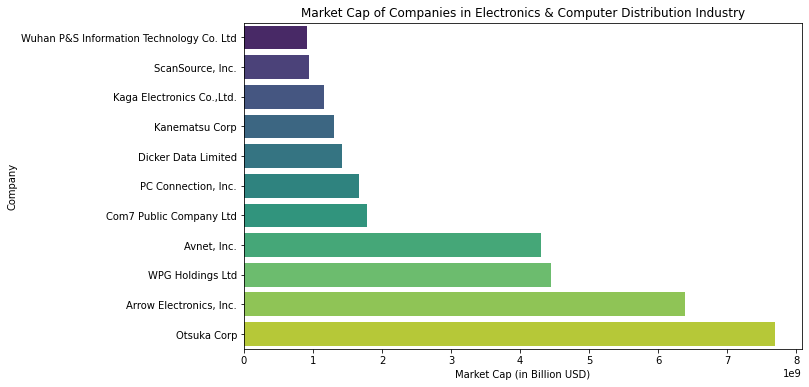

In [184]:
industry_data_sorted = test_data.sort_values('Market Cap', ascending='False')
plt.figure(figsize=(10,6))

sns.barplot(x="Market Cap", y="Company", data=industry_data_sorted, palette='viridis')
plt.title(f"Market Cap of Companies in {'Electronics & Computer Distribution'} Industry")
plt.xlabel("Market Cap (in Billion USD)")
plt.ylabel("Company")

plt.show()
